### Importing basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
df = pd.read_csv('loan_data.csv')

### Checking the basic details about dataset

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

##### There are 615 entries with 13 columns.

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##### These are the column names in our dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### There are 1 integer column, 4 floating columns. So their are total of 5 numeric columns and 8 object (categorical) columns. 

##### There are missing values in some of the columns. 

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### These are the description of 5 Numerical columns. Count of each column, mean, standard deviation, minimum value, maximum value, quantiles and percentiles. And there are some missing datas in the numerical columns too..

### Checking for missing values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Visualization of missing values

<Axes: >

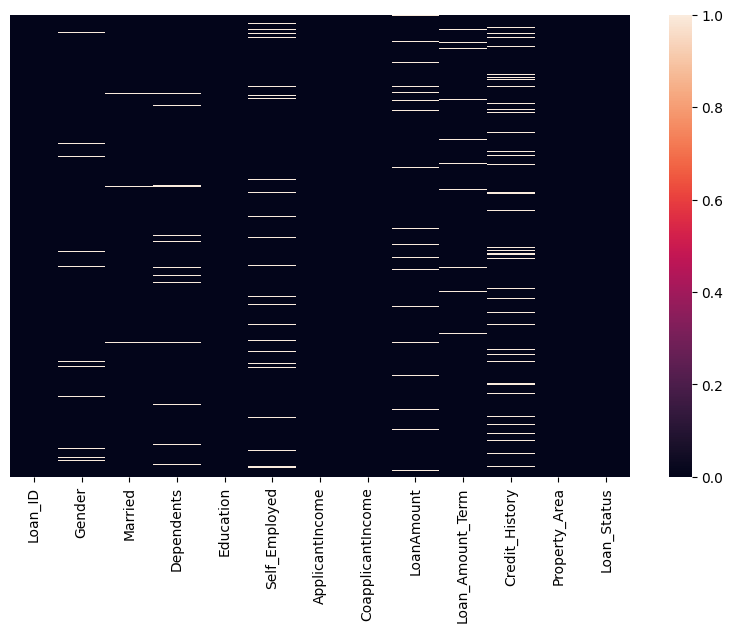

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False)

### Handling Missing Values

In [11]:
import copy

df_copy = df.copy(deep=True)
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### So the columns with missing values are Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History. 

In [12]:
# Gender --> 13 missing data

df_copy['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

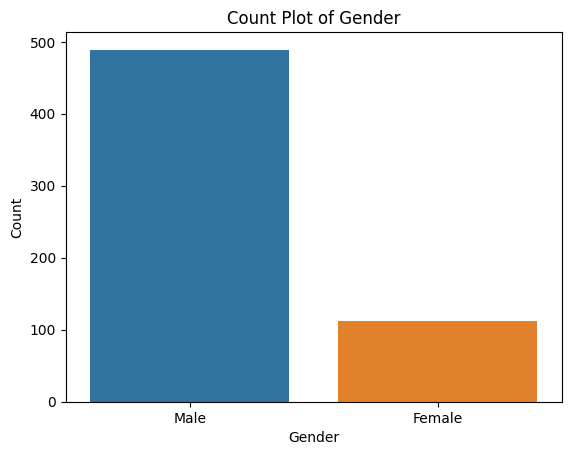

In [13]:
sns.countplot(x='Gender', data=df_copy)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Gender')
plt.show()

##### So in this case, as majority of Genders are male, we can replace those missing values with 'Male'.

In [14]:
# Replace NaN values in the 'Gender' column with 'Male'
df_copy['Gender'].fillna('Male', inplace=True)

In [15]:
# Married & Dependents
# Married --> 3
# Dependents --> 15

df_copy['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
df_copy['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
# Select rows where 'Dependents' is NaN
Dependents_null = df_copy[df_copy['Dependents'].isna()]

In [18]:
Dependents_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [19]:
# # Select only 'Married' and 'Dependents' columns
result = Dependents_null[['Married', 'Dependents']]
print(result)

    Married Dependents
102     Yes        NaN
104     NaN        NaN
120     Yes        NaN
226     Yes        NaN
228     NaN        NaN
293      No        NaN
301     Yes        NaN
332      No        NaN
335     Yes        NaN
346     Yes        NaN
355      No        NaN
435     NaN        NaN
517     Yes        NaN
571     Yes        NaN
597      No        NaN


##### Analysis : 
     Replace 3 NaN in Married with 'No' and its correspondent Dependents with '0'.
       Replace with '1' in dependents were the Married are 'Yes'.
       But when we analyze the given data, we can find there are so many married people with 0 dependents.
       So for safer side we can replace those with all NaN with 0 in Dependents
       and with 'No' in Married.

In [20]:
# Replace 'Y' with 1 and 'N' with 0 in the 'loan_status' column
df_copy['Loan_Status'] = df_copy['Loan_Status'].replace({'Y': 1, 'N': 0})

In [21]:
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [22]:
df_copy['Dependents'].fillna(0, inplace=True)

In [23]:
df_copy['Married'].fillna('No', inplace=True)

In [24]:
# Replace '3+' with 3 in the 'Dependents' column
df_copy['Dependents'] = df_copy['Dependents'].replace('3+', 3)
# Convert the 'Dependents' column to numeric
df_copy['Dependents'] = pd.to_numeric(df_copy['Dependents'], errors='coerce')

In [25]:
df_copy.corr()

C:\Users\sonya\AppData\Local\Temp\ipykernel_8736\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.166106,-0.102028,-0.038702,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.166106,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.102028,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.038702,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.010118,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


In [26]:
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [27]:
# Self_Employed --> 32

df_copy['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

##### As majority of peoples are Not self employed, we are filling the NaN's with No

In [28]:
df_copy['Self_Employed'].fillna('No', inplace=True)

In [29]:
# Loan Amount  --> 22

df_copy['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [30]:
# As 'LoanAmount' is highly correlated to ApplicantIncome, 

Loanamt_income = df_copy[['LoanAmount','ApplicantIncome']]
Loanamt_income.head()

,LoanAmount,ApplicantIncome
0,NaN,5849
1,128.0,4583
2,66.0,3000
3,120.0,2583
4,141.0,6000


Text(0.5, 1.0, 'Scatter Plot of LoanAmount vs Applicant Income')

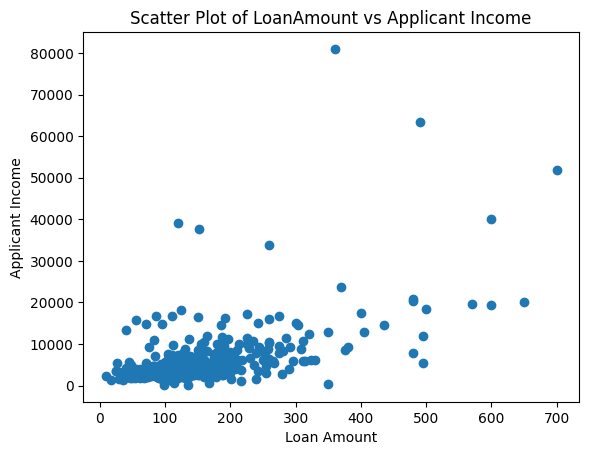

In [31]:
# Create a scatter plot
plt.scatter(df_copy['LoanAmount'], df_copy['ApplicantIncome'])
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Scatter Plot of LoanAmount vs Applicant Income')

In [32]:
LoanAmount_null = df_copy[df_copy['LoanAmount'].isna()]
LoanAmount_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,1
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,0
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,1
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,0
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,1
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,1
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,1
202,LP001682,Male,Yes,3,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,0


In [33]:
# # Select only 'Applicant Income' and 'Loan Amount' columns
result1 = LoanAmount_null[['ApplicantIncome', 'LoanAmount']]
print(result1)

     ApplicantIncome  LoanAmount
0               5849         NaN
35              2275         NaN
63              4945         NaN
81              2395         NaN
95              6782         NaN
102            13650         NaN
103             4652         NaN
113             7451         NaN
127             3865         NaN
202             3992         NaN
284            20667         NaN
305             2000         NaN
322             3601         NaN
338             1830         NaN
387             3010         NaN
435            10047         NaN
437             2213         NaN
479             2947         NaN
524             4680         NaN
550             6633         NaN
551             2492         NaN
605             2400         NaN


In [34]:
df_copy['LoanAmount'].mean()

146.41216216216216

In [35]:
# def replace_loan_amount(row):
#     if pd.isna(row['LoanAmount']):
#         if (row['ApplicantIncome'] > 0) & (row['ApplicantIncome'] <= 2000):
#             return 150
#         elif (row['ApplicantIncome'] >= 2001) & (row['ApplicantIncome'] <= 4000):
#             return 350
#         elif row['ApplicantIncome'] > 4001:
#             return 450
#     else:
#         return row['LoanAmount']

# # Assuming df_copy is your DataFrame
# df_copy['LoanAmount'] = df_copy.apply(replace_loan_amount, axis=1)


# def replace_loan_amount(row):
#     if pd.isna(row['LoanAmount']):
#         if (row['ApplicantIncome'].between(0,2000)):
#             return 150
#         elif (row['ApplicantIncome'].between(2001,4000)):
#             return 350
#         elif row['ApplicantIncome'] > 4001:
#             return 450
#     else:
#         return row['LoanAmount']

# # Assuming df_copy is your DataFrame
# df_copy['LoanAmount'] = df_copy.apply(replace_loan_amount, axis=1)



# def replace_loan_amount(row):
#     if pd.isna(row['LoanAmount']):
#         if row['ApplicantIncome'] <= 2000:
#             return 150
#         elif 2001 <= row['ApplicantIncome'] <= 4000:
#             return 350
#         else:
#             return 450
#     else:
#         return row['LoanAmount']

# # Assuming df_copy is your DataFrame
# df_copy['LoanAmount'] = df_copy.apply(replace_loan_amount, axis=1)


In [36]:
df_copy['LoanAmount'].fillna(146.41, inplace=True)

In [37]:
# Display all rows without truncation
pd.set_option('display.max_rows', None)

df_copy.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.00,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.00,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.00,360.0,1.0,Semiurban,0


Text(0.5, 1.0, 'Scatter Plot of LoanAmount vs Applicant Income')

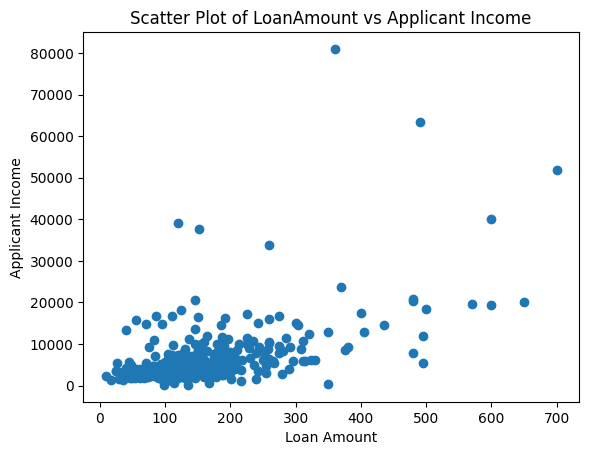

In [38]:
# Create a scatter plot
plt.scatter(df_copy['LoanAmount'], df_copy['ApplicantIncome'])
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.title('Scatter Plot of LoanAmount vs Applicant Income')

In [39]:
#Loan_Amount_Term  --> 14

df_copy['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

##### Mostly the term is for 360 days. So replacing those 14 missing values with 360.0

In [40]:
df_copy['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [41]:
# Credit_History

df_copy['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Text(0.5, 1.0, 'Countr Plot of Credit History vs Loan Status')

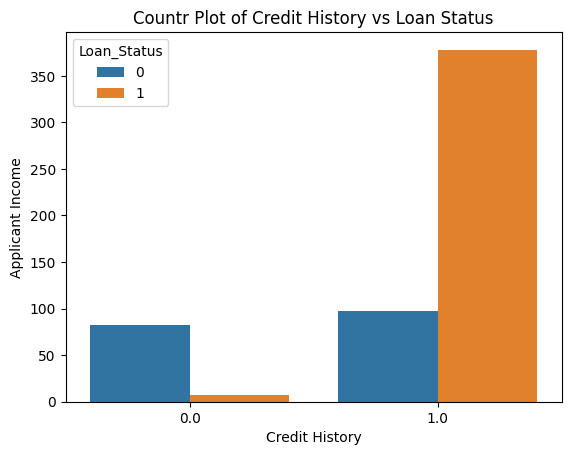

In [42]:
# Create a count plot
sns.countplot(x='Credit_History', hue='Loan_Status', data=df_copy)
plt.xlabel('Credit History')
plt.ylabel('Applicant Income')
plt.title('Countr Plot of Credit History vs Loan Status')

##### From ths we can analyze that, in most of the cases, if the Credit history is good(1), the loan status is approved(1).
##### So we are replacing the NaN's of Credit_History as 1 where Loan_Status is 1.
##### And with 0 where Loan_Status is 0.

In [43]:
Credithist_null = df_copy[df_copy['Credit_History'].isna()]
Credithist_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.00,240.0,NaN,Urban,1
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.00,360.0,NaN,Semiurban,0
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.00,360.0,NaN,Urban,0
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.00,360.0,NaN,Urban,1
79,LP001264,Male,Yes,3,Not Graduate,Yes,3333,2166.0,130.00,360.0,NaN,Semiurban,1
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.00,360.0,NaN,Semiurban,0
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.00,360.0,NaN,Semiurban,1
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.41,360.0,NaN,Urban,0
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.00,360.0,NaN,Urban,1
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.00,360.0,NaN,Rural,1


In [44]:
result = Credithist_null[['Credit_History', 'Loan_Status']]
print(result)

     Credit_History  Loan_Status
16              NaN            1
24              NaN            0
30              NaN            0
42              NaN            1
79              NaN            1
83              NaN            0
86              NaN            1
95              NaN            0
117             NaN            1
125             NaN            1
129             NaN            0
130             NaN            1
156             NaN            1
181             NaN            0
187             NaN            1
198             NaN            1
219             NaN            1
236             NaN            0
237             NaN            1
259             NaN            0
260             NaN            1
279             NaN            1
309             NaN            1
313             NaN            1
317             NaN            1
318             NaN            1
323             NaN            1
348             NaN            1
363             NaN            1
377       

In [45]:
# Replace NaN values in 'Credit_History' based on 'Loan_Status'
df_copy['Credit_History'] = df_copy.apply(lambda row: 1.0 if row['Loan_Status'] == 1 else 0.0 if row['Loan_Status'] == 0 else row['Credit_History'], axis=1)

In [46]:
df_copy.head(40)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,0.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.00,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.00,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.00,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.00,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.00,360.0,0.0,Semiurban,0


In [47]:
df_copy.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Feature Selection

In [48]:
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,0.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,1


In [49]:
df_copy.corr()

C:\Users\sonya\AppData\Local\Temp\ipykernel_8736\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.163106,-0.103864,0.010118,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.046531,-0.004710,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187829,-0.059383,-0.059187,-0.059187
LoanAmount,0.163106,0.565620,0.187829,1.000000,0.036475,-0.036416,-0.036416
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036475,1.000000,-0.022549,-0.022549
Credit_History,0.010118,-0.004710,-0.059187,-0.036416,-0.022549,1.000000,1.000000
Loan_Status,0.010118,-0.004710,-0.059187,-0.036416,-0.022549,1.000000,1.000000


C:\Users\sonya\AppData\Local\Temp\ipykernel_8736\1686734899.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')


<Axes: >

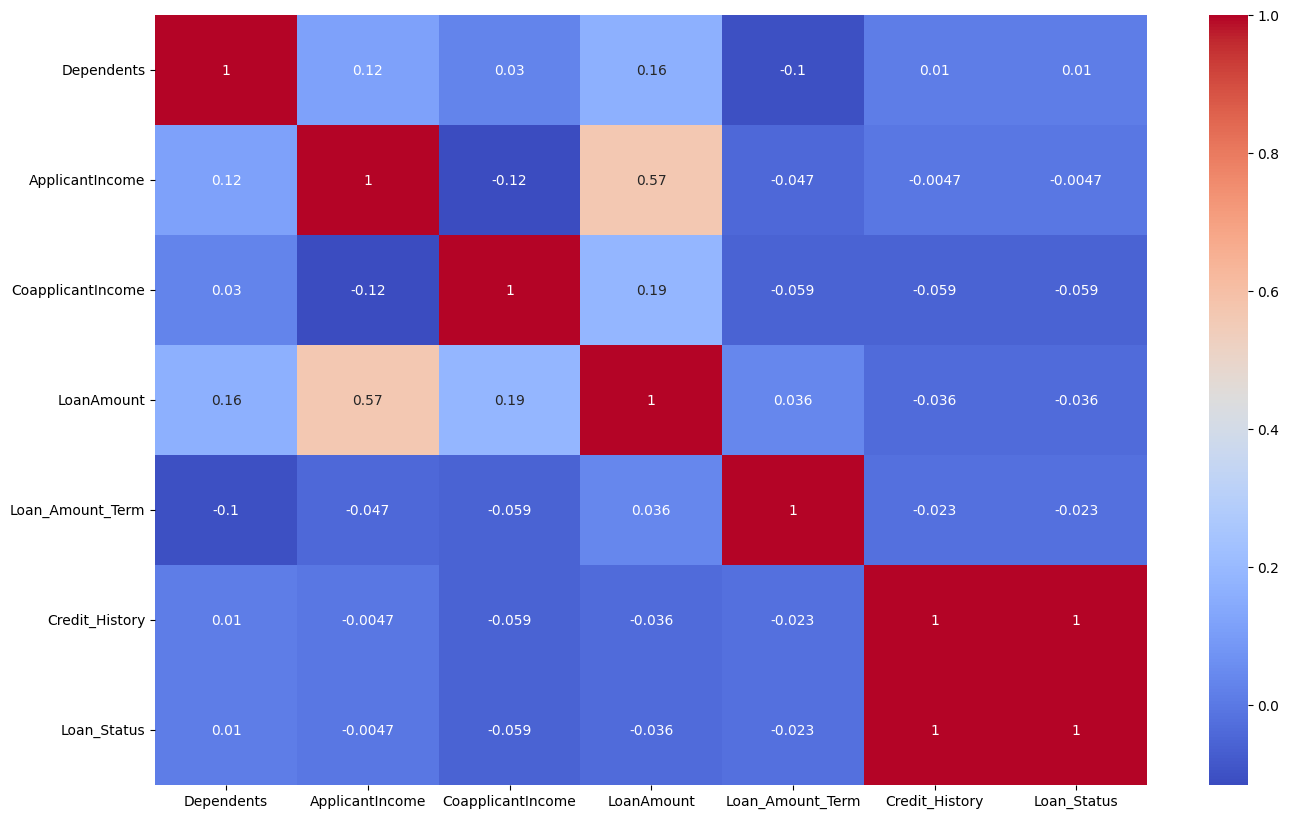

In [50]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')

### Checking the correlation between categorical variables with the Target variable Loan_Status

In [51]:
# Create a contingency table
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_copy['Gender'], df_copy['Loan_Status'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared value: {chi2}')
print(f'P-value: {p}')

# Check correlation
if p < 0.05:
    print("There is a significant correlation between 'Gender' and 'Loan_Status'.")
else:
    print("There is no significant correlation between 'Gender' and 'Loan_Status'.")

Chi-squared value: 0.11087854691241235
P-value: 0.7391461310869638
There is no significant correlation between 'Gender' and 'Loan_Status'.


In [52]:
# Create a contingency table
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_copy['Married'], df_copy['Loan_Status'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared value: {chi2}')
print(f'P-value: {p}')

# Check correlation
if p < 0.05:
    print("There is a significant correlation between 'Married' and 'Loan_Status'.")
else:
    print("There is no significant correlation between 'Married' and 'Loan_Status'.")

Chi-squared value: 3.98896957299213
P-value: 0.04579906457828366
There is a significant correlation between 'Married' and 'Loan_Status'.


In [53]:
# Create a contingency table
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_copy['Property_Area'], df_copy['Loan_Status'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared value: {chi2}')
print(f'P-value: {p}')

# Check correlation
if p < 0.05:
    print("There is a significant correlation between 'Property_Area' and 'Loan_Status'.")
else:
    print("There is no significant correlation between 'Property_Area' and 'Loan_Status'.")

Chi-squared value: 12.297623130485675
P-value: 0.0021360187811644937
There is a significant correlation between 'Property_Area' and 'Loan_Status'.


In [54]:
columns_to_drop = ['Loan_ID','Dependents','Gender','Self_Employed']
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,Graduate,5849,0.0,146.41,360.0,1.0,Urban,1
1,Yes,Graduate,4583,1508.0,128.00,360.0,0.0,Rural,0
2,Yes,Graduate,3000,0.0,66.00,360.0,1.0,Urban,1
3,Yes,Not Graduate,2583,2358.0,120.00,360.0,1.0,Urban,1
4,No,Graduate,6000,0.0,141.00,360.0,1.0,Urban,1


### Checking for the Outliers

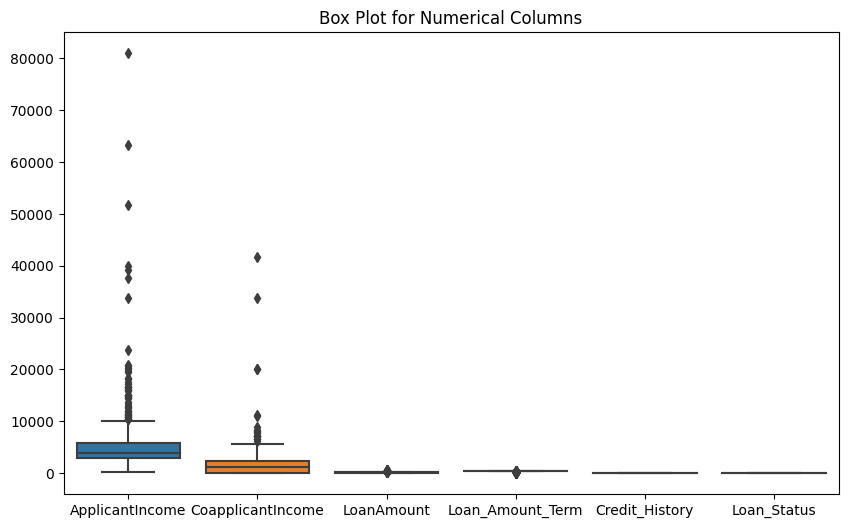

In [55]:
# Create box plots for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy)
plt.title('Box Plot for Numerical Columns')
plt.show()

##### Since outliers in the income column can be happend, we can ignore it and doesn't need to handle the outliers 

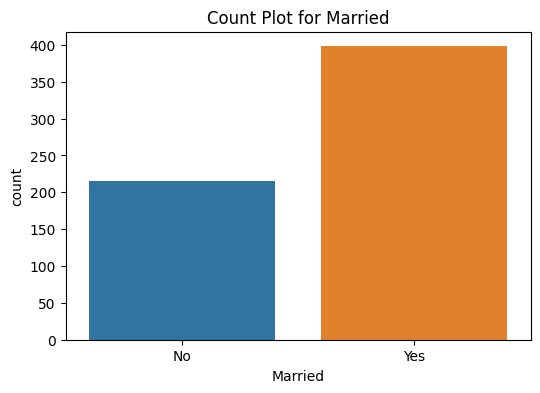

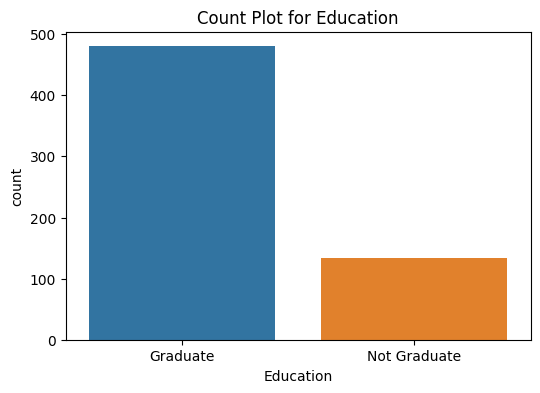

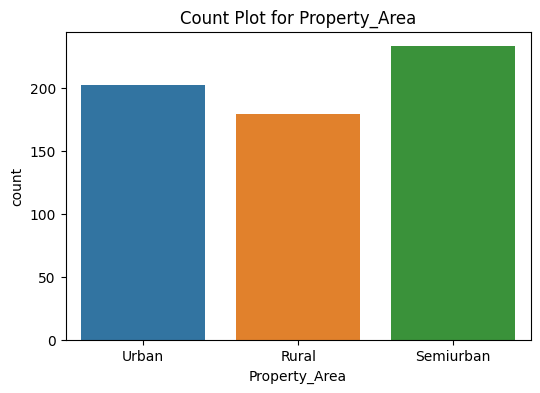

In [56]:
# Identify categorical columns
categorical_columns = df_copy.select_dtypes(include=['object']).columns

# Create count plots for all categorical columns
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df_copy)
    plt.title(f'Count Plot for {column}')
    plt.show()

###  Encoding Categorical Variables

In [57]:
df_copy.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,Graduate,5849,0.0,146.41,360.0,1.0,Urban,1
1,Yes,Graduate,4583,1508.0,128.00,360.0,0.0,Rural,0
2,Yes,Graduate,3000,0.0,66.00,360.0,1.0,Urban,1
3,Yes,Not Graduate,2583,2358.0,120.00,360.0,1.0,Urban,1
4,No,Graduate,6000,0.0,141.00,360.0,1.0,Urban,1


In [58]:
df_copy = pd.get_dummies(df_copy, columns=['Married','Education','Property_Area'], drop_first=True)

In [59]:
df_copy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.41,360.0,1.0,1,0,0,0,1
1,4583,1508.0,128.00,360.0,0.0,0,1,0,0,0
2,3000,0.0,66.00,360.0,1.0,1,1,0,0,1
3,2583,2358.0,120.00,360.0,1.0,1,1,1,0,1
4,6000,0.0,141.00,360.0,1.0,1,0,0,0,1


In [60]:
df_copy.shape

(614, 10)

### Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
X = df_copy.drop('Loan_Status', axis=1)
y = df_copy['Loan_Status']

In [62]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.41,360.0,1.0,0,0,0,1
1,4583,1508.0,128.00,360.0,0.0,1,0,0,0
2,3000,0.0,66.00,360.0,1.0,1,0,0,1
3,2583,2358.0,120.00,360.0,1.0,1,1,0,1
4,6000,0.0,141.00,360.0,1.0,0,0,0,1


In [63]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
83,6000,2250.0,265.0,360.0,0.0,1,0,1,0
90,2958,2900.0,131.0,360.0,1.0,1,0,1,0
227,6250,1695.0,210.0,360.0,1.0,1,0,1,0
482,2083,3150.0,128.0,360.0,1.0,1,0,1,0
464,4166,0.0,98.0,360.0,0.0,0,0,1,0


In [66]:
X_train.shape

(491, 9)

In [67]:
y_train.shape

(491,)

In [68]:
X_test.shape

(123, 9)

In [69]:
y_test.shape

(123,)

### Scaling

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Columns to be standardized
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'  # Keep columns not specified in transformers unchanged
)

# Apply the ColumnTransformer to the DataFrame
Xtrain_scaled = pd.DataFrame(preprocessor.fit_transform(X_train), columns=X_train.columns)

# Display the updated DataFrame with standardized columns
print(Xtrain_scaled)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.083915           0.180667    1.349993          0.287611   
1          -0.429338           0.385430   -0.204747          0.287611   
2           0.126095           0.005831    0.711853          0.287611   
3          -0.576970           0.464185   -0.239555          0.287611   
4          -0.225522          -0.528127   -0.587631          0.287611   
5           2.400469           1.130767    4.888767          0.287611   
6          -0.366067           0.154206   -0.216350          0.287611   
7          -0.360668           0.075766   -0.425195          0.287611   
8          -0.316800          -0.528127   -0.471606          0.287611   
9           0.675792          -0.528127    0.444995          0.287611   
10         -0.036722          -0.077649    0.143329          0.287611   
11          0.105005          -0.016220    0.444995          2.081982   
12         -0.435749          -0.523049   -0.715259

In [71]:
#Xtest_scaled = Xtrain_scaled.fit_transform(X_test)
Xtest_scaled = pd.DataFrame(preprocessor.transform(X_test), columns=X_test.columns)
Xtest_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0.604085,-0.528127,0.920699,0.287611,1.0,1.0,0.0,1.0,0.0
1,-0.201226,-0.528127,-0.216350,0.287611,1.0,1.0,0.0,1.0,0.0
2,-0.225353,-0.072293,0.108521,0.287611,1.0,1.0,0.0,0.0,0.0
3,-0.439124,-0.528127,-0.900899,0.287611,1.0,0.0,0.0,0.0,0.0
4,-0.469831,-0.528127,-0.912502,0.287611,1.0,0.0,0.0,1.0,0.0
5,-0.627755,0.174997,-0.483208,0.287611,1.0,1.0,0.0,0.0,0.0
6,-0.301278,-0.528127,-0.332375,0.287611,1.0,1.0,0.0,1.0,0.0
7,-0.422252,-0.528127,-0.958912,0.287611,1.0,1.0,0.0,0.0,1.0
8,-0.481810,-0.028191,0.282559,0.287611,0.0,1.0,1.0,0.0,0.0
9,-0.759696,0.423863,-0.448400,0.287611,0.0,1.0,0.0,0.0,1.0


### Model ---> Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression 

In [73]:
logistic_model = LogisticRegression()
logistic_model.fit(Xtrain_scaled, y_train)

LogisticRegression()

In [74]:
y_pred = logistic_model.predict(Xtest_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

In [76]:
print(accuracy)

1.0


In [77]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

1.0

In [78]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

1.0

In [79]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1

1.0

### Decision Tree Classifier

In [80]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
# Create a Decision Tree classifier with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Create a Decision Tree classifier with Gini criterion
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
# Make predictions
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [84]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [85]:
# Evaluate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_entropy

1.0

In [86]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_gini

1.0

In [87]:
# Print classification report
print("Entropy Criterion:")
print(classification_report(y_test, y_pred_entropy))

Entropy Criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [88]:
print("\nGini Criterion:")
print(classification_report(y_test, y_pred_gini))


Gini Criterion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

